In [1]:
import astropy.coordinates as coord
import astropy.units as u
import astropy.constants as c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

In [2]:
uzcat = pd.read_table('uzcJ2000.tab', sep='\t', header=16, dtype='str',
                      names = ['ra','dec','Zmag','cz','cze','T','U','Ne','Zname','C','Ref', 'Oname','M','N'], skiprows=[17])
uzcat.head()


,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,000237.9,+163838,14.9,6350,19,A,1,0,000000+16220,F,,I5378S,,
1,000246.3,+185310,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,,
2,000257.0,+041231,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,,
3,000302.9,+185221,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,,
4,000305.6,-015450,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,,


In [3]:
df = uzcat.copy()

http://tdc-www.harvard.edu/uzc/uzcjformat.html .

In [4]:
uzcat['ra'] = df['ra'].apply(lambda x: '{0}h{1}m{2}s'.format(x[:2], x[2:4], x[4:]))
uzcat['dec'] = df['dec'].apply(lambda x: '{0}d{1}m{2}s'.format(x[:3],x[3:5],x[5:]))
uzcat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,00h02m37.9s,+16d38m38s,14.9,6350,19,A,1,0,000000+16220,F,,I5378S,,
1,00h02m46.3s,+18d53m10s,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,,
2,00h02m57.0s,+04d12m31s,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,,
3,00h03m02.9s,+18d52m21s,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,,
4,00h03m05.6s,-01d54m50s,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,,


In [5]:
uzcat = uzcat.applymap(lambda x:np.nan if isinstance(x, str) and x.isspace() else x)
uzcat['cz'] = uzcat['cz'].astype('float')

In [6]:
coords_uzc = coord.SkyCoord(uzcat['ra'], uzcat['dec'], frame='fk5', equinox='J2000')

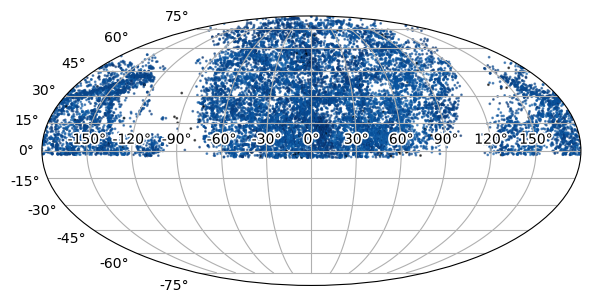

In [7]:
color_czs = (uzcat['cz']+abs(uzcat['cz'].min()))/(uzcat['cz'].max()+abs(uzcat['cz'].min()))
whitebg = withStroke(foreground="w", linewidth=2.5)
fig = plt.figure(figsize=(8,3.5))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords_uzc.ra.radian-np.pi, coords_uzc.dec.radian, 
           color=plt.cm.Blues_r(color_czs), alpha=0.6, s=4,
           marker='.', zorder=-1)
plt.grid()
for tick in ax.get_xticklabels():
    tick.set_path_effects([whitebg])
    


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

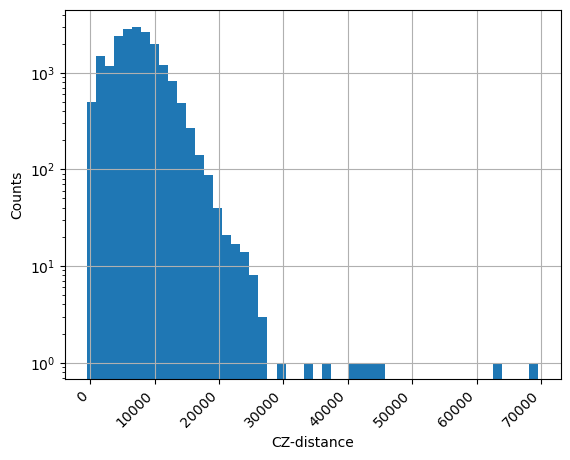

In [8]:
uzcat['cz'].hist(bins=50)
plt.yscale('log')
plt.xlabel('CZ-distance')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

The peak is around 10,000 km/s, and we cut it off at 12,500 km/s. Let's visualize this cut from top-down. Instead of looking at both RA and Dec , we will look at RA and cz . First, we create the selection:

In [9]:
uzc_czs = uzcat['cz'].values
uzcat['Zmag'] = uzcat['Zmag'].astype('float')
decmin = 15
decmax = 30
ramin = 90
ramax = 295
czmin = 0
czmax = 12500
selection_dec = (coords_uzc.dec.deg>decmin) * (coords_uzc.dec.deg<decmax)
selection_ra = (coords_uzc.ra.deg>ramin) * (coords_uzc.ra.deg<ramax)
selection_czs = (uzc_czs>czmin) * (uzc_czs<czmax)
selection= selection_dec * selection_ra * selection_czs

ValueError: s must be a scalar, or float array-like with the same size as x and y

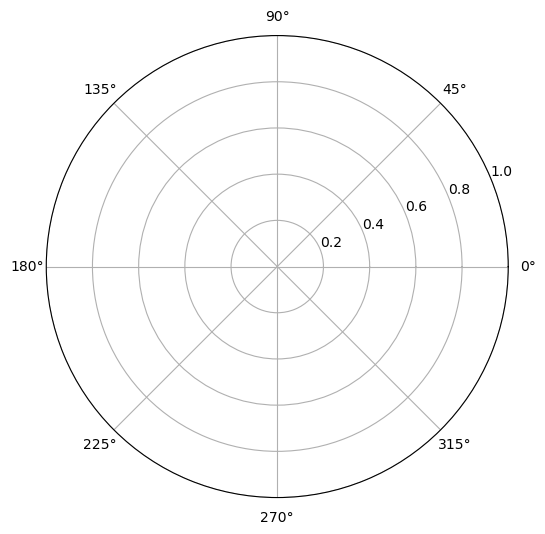

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(coords_uzc.ra.radian[selection_dec],
                 uzc_czs[selection_dec],
                color='SteelBlue',
                s=uzcat['Zmag'][selection_dec*selection_czs],
                edgecolors="none",
                alpha=0.7,
                zorder=0)

ax.set_rlim(0, 20000)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_positiom(65)
ax.set_rticks(range(2500, 20001, 5000))
ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500],
        color='IndianRed', alpha=0.8, dashes=(10,4))
theta = np.arange(ramin, ramax, 1)
ax.plot(theta*np.pi/180., np.ones_like(theta)*12500,
        color='IndianRed', alpha=0.8, dashes=(10,4))
                 
                 

In [ ]:
fig = plt.figure( figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(coords_uzc.ra.radian[selection],
                uzc_czs[selection],
                color='SteelBlue',
                s=uzcat['Zmag'][selection],
                edgecolors="none",
                alpha=0.7,
                zorder=0)
ax.set_rlim(0,12500)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_position(65)
ax.set_rticks(range(2500,12501,2500))

In [ ]:
mycat = uzcat.copy(deep=True).loc[selection]
mycat['ra_deg'] = coords_uzc.ra.deg[selection]
mycat['dec_deg'] = coords_uzc.dec.deg[selection]


In [ ]:
zs = (((mycat['cz'].values*u.km/u.s)/c.c).decompose())
dist = coord.Distance(z=zs)
print(dist)
mycat['dist'] = dist
coords_xyz = coord.SkyCoord(ra=mycat['ra_deg']*u.deg,
                            dec=mycat['dec_deg']*u.deg,
                            distance=dist*u.Mpc,
                            frame='fk5',
                            equinox='J2000')

In [ ]:
mycat['X'] = coords_xyz.cartesian.x.value
mycat['Y'] = coords_xyz.cartesian.x.value
mycat['Z'] = coords_xyz.cartesian.x.value

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,6))
plt.subplot(121)
plt.scatter(mycat['Y'], -1*mycat['X'], s=8,
            color = plt.cm.OrRd_r(10**(mycat.Zmag-mycat.Zmag.max())),
            edgecolor='None')
plt.xlabel('Y (Mpc)'); plt.ylabel('X (Mpc)')
plt.axis('equal');
plt.subplot(122)
plt.scatter(-1*mycat['X'],mycat['Z'], s=8,
color=plt.cm.OrRd_r(10**(mycat.Zmag-mycat.Zmag.max())),
edgecolor='None')
lstyle = dict(lw=1.5, color='k', dashes=(6,4))
plt.plot([0,150], [0,80], **lstyle)
plt.plot([0,150], [0,45], **lstyle)
plt.plot([0,-25], [0,80], **lstyle)
plt.plot([0,-25], [0,45], **lstyle)
plt.xlabel('X (Mpc)'); plt.ylabel('Z (Mpc)')
plt.axis('equal')
plt.subplots_adjust(wspace=0.25)

In [ ]:
TABLE_FILE = 'data_ch5_clustering.h5'
mycat.to_hdf(TABLE_FILE,'ch5data',mode='w')